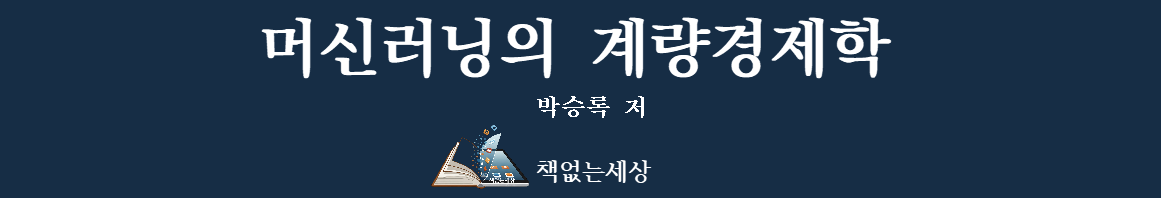

# Part 9: 인과추론

## Chapter 5: EconML을 이용한 인과추론

In [1]:
# 작업공간(working directory)지정  
import os  
os.chdir("E:/JupyterWDirectory/MyStock")
# 현재 작업공간(working directory)확인  
os.getcwd() 

'E:\\JupyterWDirectory\\MyStock'

### 가. 효율적인 인과추론을 위한 더블 머신러닝(Google Colab에서 실행 추천)

In [5]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from econml.dml import DML

from sklearn.linear_model import LinearRegression 

# 데이터세트 불러오기
data = pd.read_excel('Data/jtrain2.xlsx') 
X = data[['age', 'educ', 'black']] 
y = data['re78'] 
T = data['train'] 

# 단순기술통계량
data.describe()

,train,age,educ,black,hisp,married,nodegree,mosinex,re74,re75,re78,unem74,unem75,unem78,lre74,lre75,lre78,agesq,mostrn
count,445.000000,445.000000,445.000000,445.000000,445.00000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000,445.000000
mean,0.415730,25.370787,10.195506,0.833708,0.08764,0.168539,0.782022,18.123596,2.102266,1.377139,5.300765,0.732584,0.649438,0.307865,0.419824,0.277108,1.135802,693.977528,7.687640
std,0.493402,7.100282,1.792119,0.372762,0.28309,0.374766,0.413337,5.311937,5.363584,3.150961,6.631493,0.443109,0.477683,0.462130,0.886254,0.796783,1.136259,429.781821,9.656205
min,0.000000,17.000000,3.000000,0.000000,0.00000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.809299,-2.599059,-3.106541,289.000000,0.000000
25%,0.000000,20.000000,9.000000,1.000000,0.00000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400.000000,0.000000
50%,0.000000,24.000000,10.000000,1.000000,0.00000,0.000000,1.000000,21.000000,0.000000,0.000000,3.701810,1.000000,1.000000,0.000000,0.000000,0.000000,1.308822,576.000000,0.000000
75%,1.000000,28.000000,11.000000,1.000000,0.00000,0.000000,1.000000,23.000000,0.824389,1.220840,8.124720,1.000000,1.000000,1.000000,0.000000,0.199539,2.094911,784.000000,15.000000
max,1.000000,55.000000,16.000000,1.000000,1.00000,1.000000,1.000000,24.000000,39.570702,25.142200,60.307899,1.000000,1.000000,1.000000,3.678089,3.224548,4.099463,3025.000000,24.000000


In [6]:
# 훈련 및 검증 데이터세트로 나누기 
X_train, X_test, y_train, y_test, T_train, T_test = train_test_split(X, y, T, test_size=0.2, random_state=12345) 

In [7]:
# DML 모형 초기화 
dml_model = DML(model_y=RandomForestRegressor(), 
    model_t=RandomForestRegressor(), 
    model_final=LinearRegression(), 
    random_state=12345) 

# 모형추정
dml_model.fit(Y=y_train, T=T_train, X=X_train) 

# 처치효과(treatment effect) 추정
treatment_effects = dml_model.effect(X_test) 

print("Estimated treatment effects:", treatment_effects)
print("Estimated treatment effects(mean):", treatment_effects.mean())

Estimated treatment effects: [ 4.09427676  4.91366101  3.72123548  2.85226453  2.47922326  0.66257333
  1.81509837 -1.65541258  4.38861001  4.18376395  4.19669979  3.23608497
  2.53205959  3.26195666  3.46680272  2.05659528  3.99185373  4.09427676
  1.9175214  -2.65377121  2.63448263  6.05325021 -0.60531058  2.53205959
  4.54061973  2.53205959  2.73690566  1.71267534  2.73690566  1.71267534
 -2.12872021  2.92881588  0.66257333  4.29912282  3.97891788 -0.93954433
  4.29912282  3.97891788  4.64304277 -0.05438789  4.02850458 -0.98913102
 -0.36165698  6.34758346  3.36437969  1.18762434  2.73690566  2.53205959
  2.95468756  4.19669979  4.38861001  2.2247905   3.56922576  2.63448263
  1.49489343  5.23386595  3.56922576  4.70881495  3.36437969  4.13092761
  1.42912125  3.86355901 -0.36165698  5.73304527  3.82365851 -1.33520765
  8.42191578  3.36437969  5.01608404  3.65871294  3.56922576  0.8674194
  5.22093011  3.46680272  2.60861094  3.87649485  0.76499637  4.08134091
  1.0852013   2.1094316

C:\Users\PARKSeungRok\anaconda3\Lib\site-packages\econml\dml\dml.py:192: UserWarning: The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
  warn("The final model has a nonzero intercept for at least one outcome; "


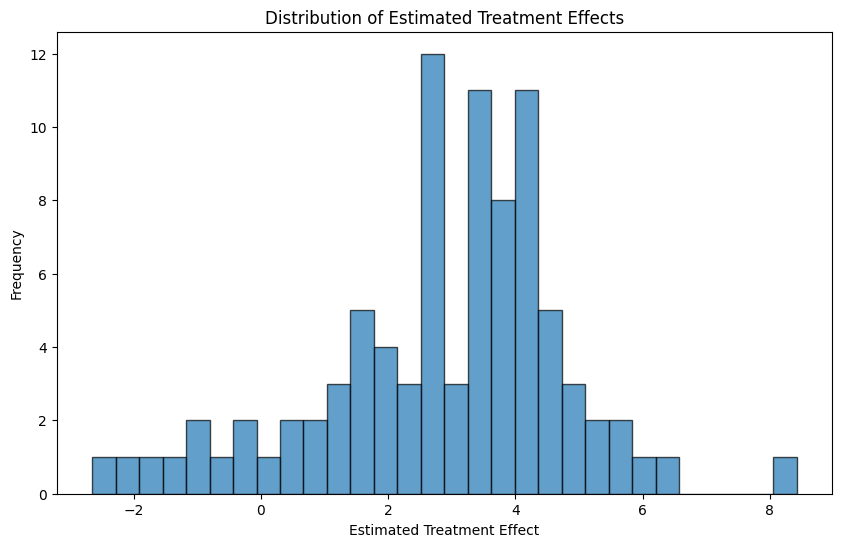

In [8]:
import matplotlib.pyplot as plt 
# 추정된 처치효과의 히스토그램 
plt.figure(figsize=(10, 6)) 
plt.hist(treatment_effects, bins=30, edgecolor='k', alpha=0.7) 
plt.title('Distribution of Estimated Treatment Effects')
plt.xlabel('Estimated Treatment Effect') 
plt.ylabel('Frequency') 
plt.show() 

### 나. 이중 견고 학습

In [14]:
# 이중 견고 학습(Doubly Robust Learning)
from econml.dr import LinearDRLearner
# DRL 모형 초기화 
drl_model = LinearDRLearner()

# 모형추정
drl_model.fit(Y=y_train, T=T_train, X=X_train) 

# 처치효과(treatment effect) 추정
treatment_effects = drl_model.effect(X_test) 
print("Estimated treatment effects:", treatment_effects)
print("Estimated treatment effects(mean):", treatment_effects.mean())

Estimated treatment effects: [ 2.91566695  3.17488378  2.33790393  2.12667221  1.54890919  0.24571952
  1.40248167 -2.46797429  2.61270375  2.54789955  2.94806906  1.4559416
  1.62929639  2.25628062  2.32108483  1.01913127  2.88326485  2.91566695
  1.43488377 -1.9916563   1.66169849  3.93147642 -1.34361424  1.62929639
  2.59712076  1.62929639  1.6941006   1.37007957  1.6941006   1.37007957
 -1.42947628  1.35873529  0.24571952  2.98047116  2.48309534 -0.72086874
  2.98047116  2.48309534  2.62952286  0.0189048   2.43511024 -0.67288364
 -0.07830151  3.62851322  2.28868272  0.80789954  1.6941006   1.62929639
  2.15907431  2.94806906  2.61270375  1.53209008  2.35348693  1.66169849
  0.90510585  3.6722596   2.35348693  3.11007957  2.28868272  2.46751234
  0.42454914  2.05052373 -0.07830151  3.4341006   2.37030604 -1.97059847
  5.0768943   2.28868272  3.20728588  1.98571952  2.35348693  0.31052372
  3.27209009  2.32108483  0.86135948  2.45069324  0.27812162  2.51549744
  0.77549744  1.0995184

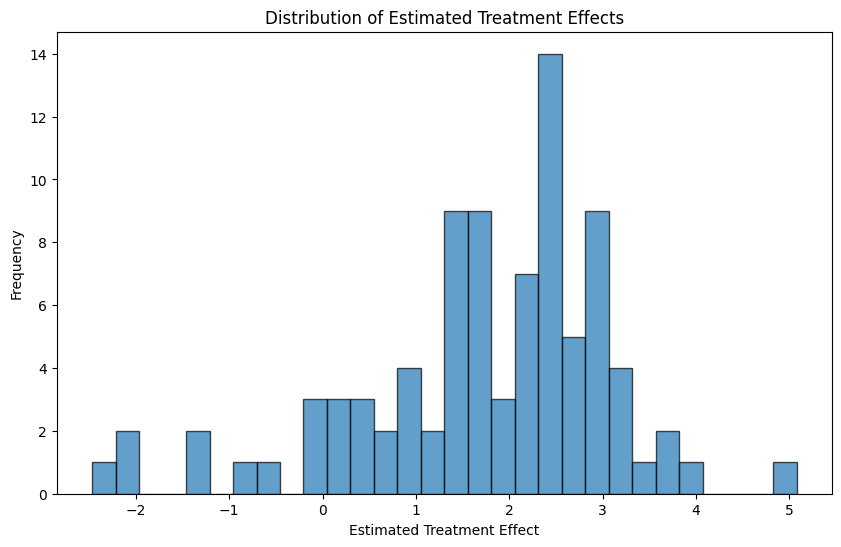

In [15]:
# 추정된 처치효과의 히스토그램 
plt.figure(figsize=(10, 6)) 
plt.hist(treatment_effects, bins=30, edgecolor='k', alpha=0.7) 
plt.title('Distribution of Estimated Treatment Effects')
plt.xlabel('Estimated Treatment Effect') 
plt.ylabel('Frequency') 
plt.show() 

### 다. 포레스트 기반 인과모형: 앙상블 기법을 활용한 인과 추정

In [11]:
# Forest based 모형 
import sklearn
from econml.orf import DMLOrthoForest, DROrthoForest

# Forest based 모형 초기화 
causal_forest = DMLOrthoForest(n_trees=1, max_depth=1, subsample_ratio=1,
                     model_T=sklearn.linear_model.LinearRegression(),
                     model_Y=sklearn.linear_model.LinearRegression())

# 모형추정
causal_forest.fit(Y=y_train, T=T_train, X=X_train, W=X_train) 

# 처치효과(treatment effect) 추정
treatment_effects = causal_forest.effect(X_test) 
print("Estimated treatment effects:", treatment_effects)
print("Estimated treatment effects(mean):", treatment_effects.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Estimated treatment effects: [12.01821427 12.52397692  8.50443174  1.99488266 -1.51889987  1.93658413
 -0.98253606 16.23895004  2.94318763  2.81674697 12.0814346   6.71895538
 -1.31492693  2.24776398  2.37420465 -2.03880661 11.95499394 12.01821427
 -1.03002047  3.54298061 -1.36241134 22.4840882  10.96321792 -1.31492693
  9.01019439 -1.31492693 -1.40989575 -0.93505165 -1.40989575 -0.93505165
  0.90511454  5.60591978  1.93658413 12.14465493  2.6903063   0.73083725
 12.14465493  2.6903063   9.07341472 -0.66049893  8.69409273  0.49331967
 -1.77353452 13.40906156  2.31098432 -0.70128193 -1.40989575 -1.31492693
  2.05810299 12.0814346   2.94318763 -1.1724737   2.43742498 -1.36241134
  0.41175367 21.97832555  2.43742498 12.39753626  2.31098432  8.75731306
  4.77118477 -1.93222426 -1.77353452 13.02973957  8.56765207 12.85906025
 33.20284346  2.31098432 12.58719725 -1.83725544  2.43742498  2.67860786
 12.71363792  2.37420465  8.98580958  2.62708597  2.307596    2.75352663
 -1.0722938   2.637824

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  74 out of  89 | elapsed:   13.8s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done  89 out of  89 | elapsed:   13.8s finished


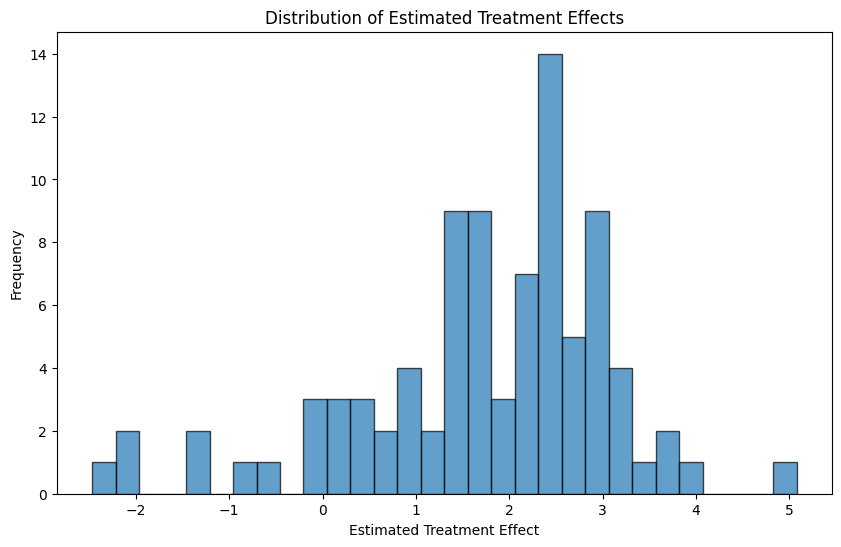

In [16]:
# 추정된 처치효과의 히스토그램 
plt.figure(figsize=(10, 6)) 
plt.hist(treatment_effects, bins=30, edgecolor='k', alpha=0.7) 
plt.title('Distribution of Estimated Treatment Effects')
plt.xlabel('Estimated Treatment Effect') 
plt.ylabel('Frequency') 
plt.show() 

### 라. 인과추론을 위한 메타 러닝

#### 1) S learner 

Estimated treatment effects_S: [-5.4692309  14.49158264  1.06782797 -0.7881102   3.30117896  0.38459651
  3.15455407 -2.31936514  4.66033198  4.75674108 -1.75350644 -4.43391435
 -1.82246397  3.86092291 -0.34536835 -2.96522823  1.08461863 -5.4692309
  2.19546309  0.45129063 -0.22052397  4.88243385 -2.24691019 -1.82246397
  8.21736302 -1.82246397 -0.10737374  1.46291995 -0.10737374  1.46291995
  1.50584592 -0.39671585  0.38459651  3.03247369  3.54983058 -2.98995164
  3.03247369  3.54983058  8.18726622  1.19087266  1.15202506  0.41807644
 -2.41413352  3.11035352  1.88014931  2.63342543 -0.10737374 -1.82246397
  2.55174874 -1.75350644  4.66033198  5.71516466  0.49959855 -0.22052397
 -3.15897595  2.16972248  0.49959855  5.05179959  1.88014931 -1.28628456
  0.22887615 -0.5959814  -2.41413352  8.29048795  0.37752368 -2.31936514
  2.65661076  1.88014931  3.93187793  1.4068501   0.49959855 -1.58059782
  7.89867537 -0.34536835 -5.22854348 16.1963691   5.00035433  5.06425628
 -0.33580894 -0.19920

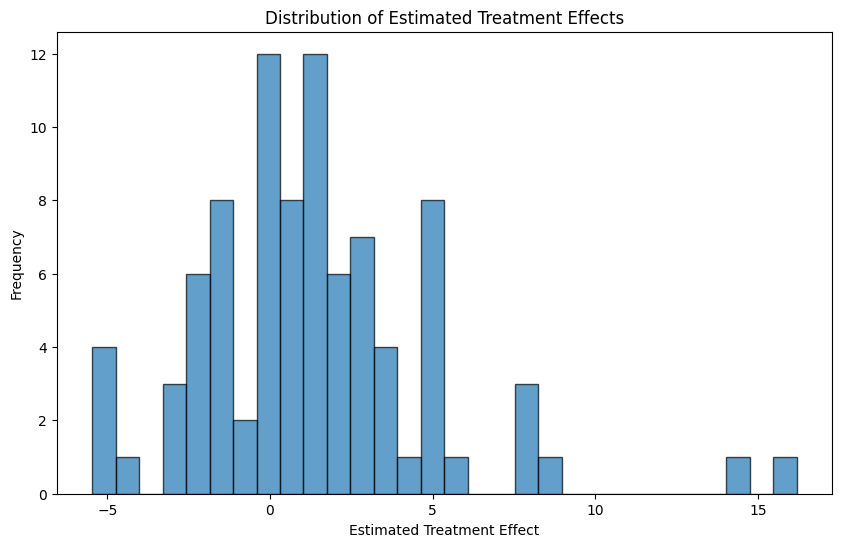

In [17]:
from econml.metalearners import SLearner, TLearner, XLearner
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor

# S learner 초기화
overall_model = GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_leaf=int(445/100))
S_learner = SLearner(overall_model=overall_model)

# 모형의 추정
S_learner.fit(Y=y_train, T=T_train, X=X_train) 

# 처치효과(treatment effects) 추정
treatment_effects_S = S_learner.effect(X_test)

print("Estimated treatment effects_S:", treatment_effects_S)
print("Estimated treatment effects_S(mean):", treatment_effects_S.mean())

# 추정된 처치효과의 히스토그램 
plt.figure(figsize=(10, 6)) 
plt.hist(treatment_effects_S, bins=30, edgecolor='k', alpha=0.7) 
plt.title('Distribution of Estimated Treatment Effects')
plt.xlabel('Estimated Treatment Effect') 
plt.ylabel('Frequency') 
plt.show() 

#### 2) T learner 

Estimated treatment effects_T: [-5.42309005 17.78822418  2.5431198  -2.56894451  1.19955646  2.25710253
  4.81862056 -0.41064675 -0.09754267  6.01147224 -1.18482251 -1.60929537
 -3.93345976  4.66599495 -3.54897216 -0.89288004  1.01697862 -5.42309005
  0.54340941  0.32484807 -1.39345429 -2.35029973 -0.41064675 -3.93345976
 13.44479126 -3.93345976 -0.30368619  2.8306881  -0.30368619  2.8306881
  3.67751698  1.30486628  2.25710253  6.98223494  6.15343176 -3.82804397
  6.98223494  6.15343176  9.98345645  3.7512607  -0.5498516   3.56031213
 -2.75981303  3.61936185  0.09129043  1.25488413 -0.30368619 -3.93345976
  2.88174622 -1.18482251 -0.09754267  5.56145574  2.35824559 -1.39345429
 -6.57312179 -1.93081417  2.35824559  4.6678501   0.09129043 -2.88615191
  6.21863038 -4.1938821  -2.75981303 10.11105193  0.07763721 -0.41064675
  8.34878619  0.09129043 -2.34163319  2.41620344  2.35824559 -1.70121843
 14.84713999 -3.54897216 -6.52631725 23.35866704 12.67393383  4.70785855
 -0.7469495   2.04297

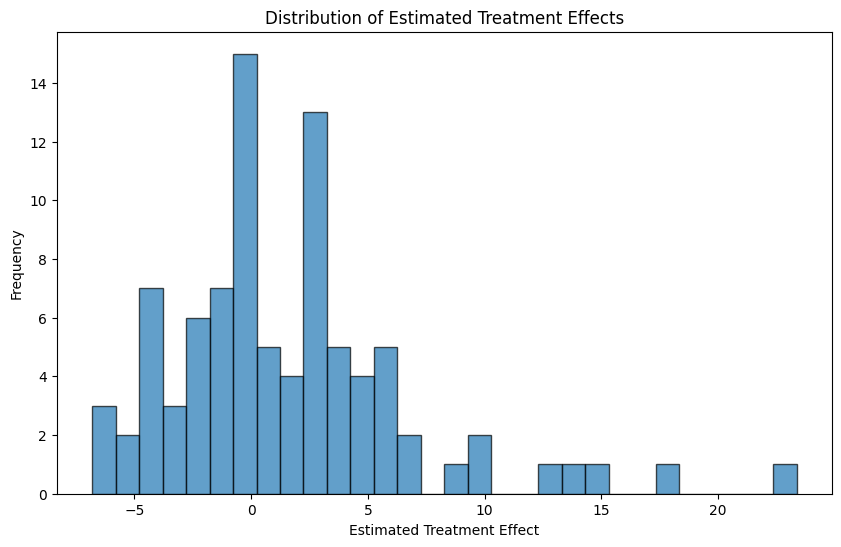

In [18]:
# T learner 초기화
models = GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_leaf=int(445/100))
T_learner = TLearner(models=models)

# 모형의 추정
T_learner.fit(Y=y_train, T=T_train, X=X_train) 

# 처치효과(treatment effects) 추정
treatment_effects_T = T_learner.effect(X_test)

print("Estimated treatment effects_T:", treatment_effects_T)
print("Estimated treatment effects_T(mean):", treatment_effects_T.mean())

# 추정된 처치효과의 히스토그램 
plt.figure(figsize=(10, 6)) 
plt.hist(treatment_effects_T, bins=30, edgecolor='k', alpha=0.7) 
plt.title('Distribution of Estimated Treatment Effects')
plt.xlabel('Estimated Treatment Effect') 
plt.ylabel('Frequency') 
plt.show() 

#### 3) X learner 

Estimated treatment effects_X: [-5.84177661 17.85173996  1.4293476  -2.26636172  3.55330936  0.39462009
  4.05171868 -5.9983435   0.77474285  5.12683783  0.1139208   1.76198403
 -3.76702396  5.37981891 -2.24546721 -3.96365538  0.73080008 -5.84177661
  1.45941206 -0.11012118 -0.88540856  2.13359576 -5.95443641 -3.76702396
 10.10525063 -3.76702396 -0.33427988  2.61837999 -0.33427988  2.61837999
  1.42510467  3.59054955  0.39462009  6.5509348   3.96064236 -2.53822617
  6.5509348   3.96064236  7.1669941   1.29671238  1.73339817  0.46140298
 -2.65802162  6.03468312  2.58013434  0.75472812 -0.33427988 -3.76702396
  1.98654354  0.1139208   0.77474285  6.29050261  2.55104173 -0.88540856
 -6.00497143  4.87752858  2.55104173  5.21984081  2.58013434 -2.21347704
 -0.88344174 -0.85072783 -2.65802162 11.71379005 -0.09038971 -5.9983435
  9.82738058  2.58013434 -0.58910726  0.35925644  2.55104173 -2.47834476
 13.20968416 -2.24546721 -7.79187089 22.21797368 10.38107203  3.74818695
 -1.30454234  2.78185

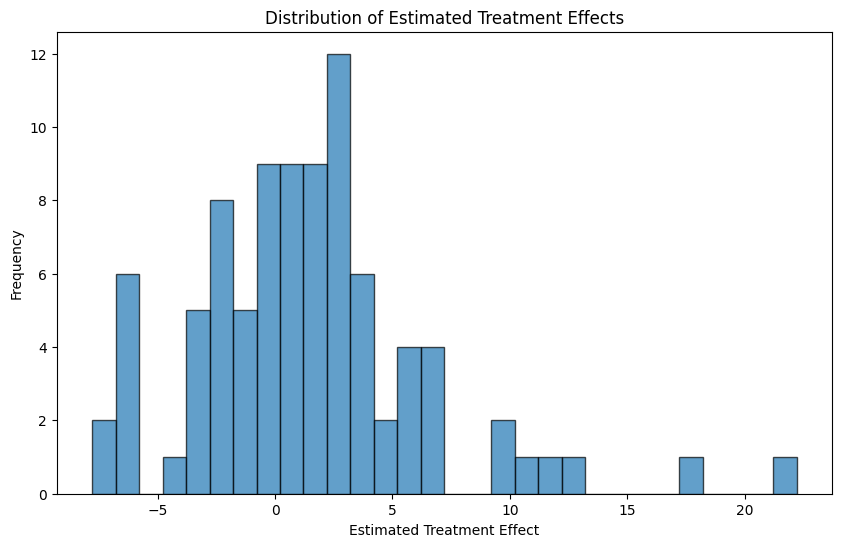

In [19]:
# X learner 초기화
model = GradientBoostingRegressor(n_estimators=100, max_depth=6, min_samples_leaf=int(445/100))
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6,
                                          min_samples_leaf=int(445/100))
X_learner = XLearner(models=model, propensity_model=propensity_model)

# 모형의 추정
X_learner.fit(Y=y_train, T=T_train, X=X_train) 

# 처치효과(treatment effects) 추정
treatment_effects_X = X_learner.effect(X_test)

print("Estimated treatment effects_X:", treatment_effects_X)
print("Estimated treatment effects_X(mean):", treatment_effects_X.mean())

# 추정된 처치효과의 히스토그램 
plt.figure(figsize=(10, 6)) 
plt.hist(treatment_effects_X, bins=30, edgecolor='k', alpha=0.7) 
plt.title('Distribution of Estimated Treatment Effects')
plt.xlabel('Estimated Treatment Effect') 
plt.ylabel('Frequency') 
plt.show() 

### 마. 인과추론을 위한 DoWhy와 EconML의 결합

In [20]:
from copy import deepcopy
import json
import time

import numpy as np
import pandas as pd
from scipy import stats

from sklearn.metrics import mean_absolute_percentage_error, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

import dowhy
from dowhy import CausalModel

from econml.metalearners import SLearner, XLearner, TLearner
from econml.dml import LinearDML, CausalForestDML, DML
from econml.dr import DRLearner, SparseLinearDRLearner

from sklearn.linear_model import LinearRegression, LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

from lightgbm import LGBMRegressor, LGBMClassifier

import networkx as nx

from tqdm import tqdm

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import graphviz

In [21]:
# 데이터세트 불러오기
data = pd.read_excel('Data/jtrain2.xlsx') 
df = data[['re78', 'train', 'age', 'educ', 'black']] 

# 단순기술통계량
df.describe()

,re78,train,age,educ,black
count,445.000000,445.000000,445.000000,445.000000,445.000000
mean,5.300765,0.415730,25.370787,10.195506,0.833708
std,6.631493,0.493402,7.100282,1.792119,0.372762
min,0.000000,0.000000,17.000000,3.000000,0.000000
25%,0.000000,0.000000,20.000000,9.000000,1.000000
50%,3.701810,0.000000,24.000000,10.000000,1.000000
75%,8.124720,1.000000,28.000000,11.000000,1.000000
max,60.307899,1.000000,55.000000,16.000000,1.000000


In [22]:
# 훈련 및 검증 데이터세트로 나누기 
df_train, df_test = train_test_split(df, test_size=0.2, random_state=12345) 
df_train

,re78,train,age,educ,black
360,6.771620,0,28,11,0
422,3.523580,0,26,8,1
18,10.804300,1,40,12,1
373,14.527901,0,31,10,1
103,4.814630,1,18,11,1
...,...,...,...,...,...
382,0.000000,0,27,11,1
425,4.779720,0,20,12,1
420,4.974590,0,28,11,1
129,1.085440,1,20,11,1


In [23]:
# Construct the graph (the graph is constant for all iterations)
nodes = ['re78', 'train', 'age', 'educ', 'black']
edges = [
    ('train', 're78'),
    ('age', 're78'),
    ('age', 'train'),
    ('educ', 're78'),
    ('educ', 'train'),
    ('black', 're78'),
    ('black', 'train'),
        ]

# Graphic Modelling Language(GML)
gml_string = 'graph [directed 1\n'
for node in nodes:
    gml_string += f'\tnode [id "{node}" label "{node}"]\n'
for edge in edges:
    gml_string += f'\tedge [source "{edge[0]}" target "{edge[1]}"]\n'
gml_string += ']'
gml_string

'graph [directed 1\n\tnode [id "re78" label "re78"]\n\tnode [id "train" label "train"]\n\tnode [id "age" label "age"]\n\tnode [id "educ" label "educ"]\n\tnode [id "black" label "black"]\n\tedge [source "train" target "re78"]\n\tedge [source "age" target "re78"]\n\tedge [source "age" target "train"]\n\tedge [source "educ" target "re78"]\n\tedge [source "educ" target "train"]\n\tedge [source "black" target "re78"]\n\tedge [source "black" target "train"]\n]'

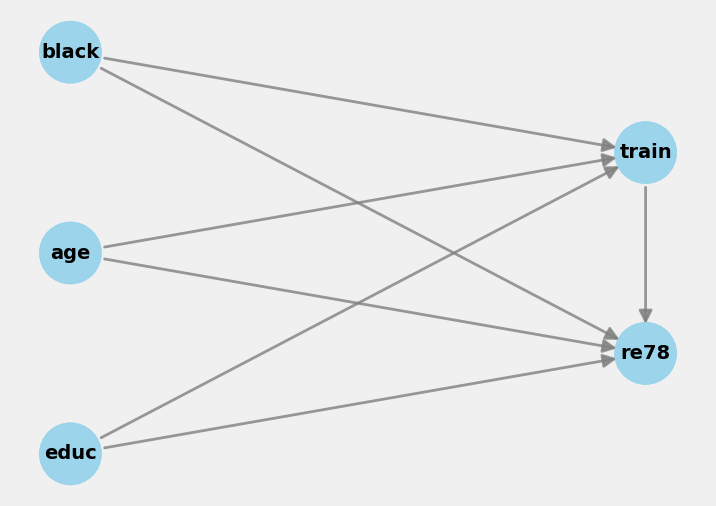

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
   d                            
────────(E[re78|educ,age,black])
d[train]                        
Estimand assumption 1, Unconfoundedness: If U→{train} and U→re78 then P(re78|train,educ,age,black,U) = P(re78|train,educ,age,black)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

### Estimand : 4
Estimand name: general_adjustment
Estimand expression:
   d                            
────────(E[re78|educ,age,black])
d[train]                        
Estimand assumption 1, Unconfoundedness: If U→{train} and U→re78 then P(re78|train,educ,age,black,U) = P(re78|train,educ,age,black)



In [24]:
# 인과모형(CausalModel) 정의
model = CausalModel(
    data=df_train,
    treatment='train',
    outcome='re78',
    effect_modifiers=['age', 'educ', 'black'],
    graph=gml_string
)
model.view_model()

# Get the estimand
estimand = model.identify_effect()
print(estimand)

In [ ]:
# EconML의 S-Learner 
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.SLearner',
    target_units='ate',
    method_params={
        'init_params': {'overall_model': LGBMRegressor(n_estimators=1000, max_depth=10)},
        'fit_params': {}
                   })
dir(estimate)
print(estimate.cate_estimates.mean())

In [ ]:
# EconML의 T-Learner
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.TLearner',
    target_units='ate',
    method_params={
        'init_params': {
        'models': [LGBMRegressor(n_estimators=1000, max_depth=10), LGBMRegressor(n_estimators=1000, max_depth=10)]
                       },
        'fit_params': {}
    })
print(estimate.cate_estimates.mean())

In [ ]:
# EconML에서 X-Learner 사용
estimate = model.estimate_effect(
    identified_estimand=estimand,
    method_name='backdoor.econml.metalearners.XLearner',
    target_units='ate',
    method_params={
        'init_params': {
        'models': [LGBMRegressor(n_estimators=1000, max_depth=10), LGBMRegressor(n_estimators=1000, max_depth=10)]
        },
        'fit_params': {}
    })
print(estimate.cate_estimates.mean())

### [보완] 메타 러니의 동시추정

In [ ]:
# Get estimates using all learners
learners = [
    ('S-Learner', 'backdoor.econml.metalearners.SLearner', {'overall_model': LGBMRegressor(n_estimators=1000, max_depth=10)}),
    ('T-Learner', 'backdoor.econml.metalearners.TLearner', {'models': [LGBMRegressor(n_estimators=1000, max_depth=10), LGBMRegressor(n_estimators=1000, max_depth=10)]}),
    ('X-Learner', 'backdoor.econml.metalearners.XLearner', {'models': [LGBMRegressor(n_estimators=1000, max_depth=10), LGBMRegressor(n_estimators=1000, max_depth=10)]}),
    ('DR-Learner', 'backdoor.econml.dr.LinearDRLearner', {'model_propensity': LogisticRegression(), 'model_regression': LGBMRegressor(n_estimators=1000, max_depth=10)}),
    ('LinearDML', 'backdoor.econml.dml.LinearDML', {'model_y': LGBMRegressor(n_estimators=1000, max_depth=10), 'model_t': LogisticRegression()}),
    ('CausalForestDML', 'backdoor.econml.dml.CausalForestDML', {'n_estimators': 1000, 'max_depth': 10})
]
for learner_name, method_name, init_params in learners:
    estimate = model.estimate_effect(
        identified_estimand=estimand,
        method_name=method_name,
        target_units='ate',
        method_params={
            'init_params': init_params,
            'fit_params': {}
                       })
    
    print(f'{learner_name} estimated treatment effect: {estimate.cate_estimates.mean()}')